
# Анализ Access Log серверов NASA за июль 1995 года

Для начала импортируем необходимые модули, загружаем access log и выводим его начало. 

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("access_log_Jul95.log", sep=" - - \[| |] \"|\" ",usecols=['Host','Time','Timezone','Method','Request','Protocol','Status','Byte'],names=['Host','Time','Timezone','Method','Request','Protocol','Status','Byte'], engine='python')#,skiprows=9001)

In [2]:
df.head()

,Host,Time,Timezone,Method,Request,Protocol,Status,Byte
0,199.72.81.55,01/Jul/1995:00:00:01,-400.0,GET,/history/apollo/,HTTP/1.0,200,6245
1,unicomp6.unicomp.net,01/Jul/1995:00:00:06,-400.0,GET,/shuttle/countdown/,HTTP/1.0,200,3985
2,199.120.110.21,01/Jul/1995:00:00:09,-400.0,GET,/shuttle/missions/sts-73/mission-sts-73.html,HTTP/1.0,200,4085
3,burger.letters.com,01/Jul/1995:00:00:11,-400.0,GET,/shuttle/countdown/liftoff.html,HTTP/1.0,304,0
4,199.120.110.21,01/Jul/1995:00:00:11,-400.0,GET,/shuttle/missions/sts-73/sts-73-patch-small.gif,HTTP/1.0,200,4179


Далее считаем количество обращений к каждому урлу и выводим список, который уже ранжирован по убыванию количества обращений.

In [4]:
url_count=df['Request'].value_counts()
print(url_count)

/images/NASA-logosmall.gif                                                111388
/images/KSC-logosmall.gif                                                  89639
/images/MOSAIC-logosmall.gif                                               60468
/images/USA-logosmall.gif                                                  60014
/images/WORLD-logosmall.gif                                                59489
/images/ksclogo-medium.gif                                                 58802
/images/launch-logo.gif                                                    40871
/shuttle/countdown/                                                        40279
/ksc.html                                                                  40231
/images/ksclogosmall.gif                                                   33585
/                                                                          32910
/history/apollo/images/apollo-logo1.gif                                    31072
/shuttle/missions/missions.h

Теперь мы можем найти топ-15 самых посещаемых урлов.

In [5]:
url_count.head(15)

/images/NASA-logosmall.gif                 111388
/images/KSC-logosmall.gif                   89639
/images/MOSAIC-logosmall.gif                60468
/images/USA-logosmall.gif                   60014
/images/WORLD-logosmall.gif                 59489
/images/ksclogo-medium.gif                  58802
/images/launch-logo.gif                     40871
/shuttle/countdown/                         40279
/ksc.html                                   40231
/images/ksclogosmall.gif                    33585
/                                           32910
/history/apollo/images/apollo-logo1.gif     31072
/shuttle/missions/missions.html             24865
/htbin/cdt_main.pl                          22626
/shuttle/countdown/count.gif                22216
Name: Request, dtype: int64

Посчитаем число запросов для каждой уникальной секунды и затем посчитаем среднее этих значений.

In [6]:
time=df['Time'].value_counts()
print(time)

13/Jul/1995:13:32:58    20
13/Jul/1995:13:32:59    18
13/Jul/1995:09:42:19    18
13/Jul/1995:09:42:20    17
13/Jul/1995:09:49:30    16
13/Jul/1995:08:35:02    16
11/Jul/1995:14:47:44    16
05/Jul/1995:16:29:15    15
12/Jul/1995:13:39:35    15
13/Jul/1995:09:34:06    15
13/Jul/1995:08:56:34    15
17/Jul/1995:14:20:57    15
13/Jul/1995:09:27:16    15
13/Jul/1995:10:41:32    14
12/Jul/1995:13:34:59    14
13/Jul/1995:09:05:34    14
24/Jul/1995:13:03:50    14
13/Jul/1995:13:28:16    14
14/Jul/1995:10:38:14    14
13/Jul/1995:09:40:57    14
13/Jul/1995:09:51:04    14
05/Jul/1995:11:41:10    14
13/Jul/1995:09:51:31    14
13/Jul/1995:09:34:52    14
13/Jul/1995:09:38:22    14
28/Jul/1995:08:20:38    13
10/Jul/1995:13:16:06    13
07/Jul/1995:12:59:49    13
06/Jul/1995:16:03:11    13
12/Jul/1995:11:08:07    13
                        ..
22/Jul/1995:01:25:28     1
07/Jul/1995:13:17:52     1
02/Jul/1995:03:09:49     1
10/Jul/1995:15:42:00     1
14/Jul/1995:18:04:35     1
16/Jul/1995:05:17:31     1
0

In [7]:
time.mean()

1.720055864804264

Для построения графика запросов в секунду записываем отдельно количество уникальных секунд и число обращений в каждую из них.

In [10]:
time_count=df['Time'].value_counts(sort=False)
second=[]
for i in range(len(time_count)):
    second.append(i)

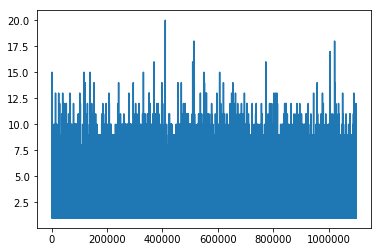

In [11]:
plt.plot(second,time_count)

Для построения гистограммы распределения размеров запросов записываем все размеры запросов в список и строим гистограмму.

In [20]:
byte_int=[]
for index,row in df.iterrows():
    if type(row['Byte'])==str:
        if re.match('^[0-9 ]+$', row['Byte']):
            byte_int.append(int(row['Byte']))

(array([1.754584e+06, 6.503300e+04, 2.083700e+04, 6.642000e+03,
        6.154000e+03, 1.745000e+03, 5.090000e+02, 2.309000e+03,
        9.360000e+02, 2.930000e+02, 1.785000e+03, 1.280000e+02,
        1.042000e+03, 2.377000e+03, 4.890000e+02, 8.440000e+02,
        1.253000e+03, 1.090000e+02, 4.270000e+02, 0.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        4.000000e+00, 2.000000e+00, 0.000000e+00, 0.000000e+00,
        4.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 2.000000e+00, 1.000000e+00, 1.100000e+01,
        0.000000e+00, 0.000000e+00, 3.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00

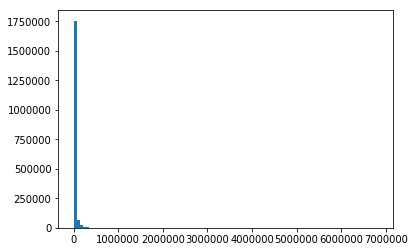

In [24]:
plt.hist(byte_int, bins=100)